<a href="https://colab.research.google.com/github/Sonali2704/Sonali2704/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <a class="anchor" id="About_Data"></a>
### <p style="padding:10px;background-color:#7EC0EE;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">**Customer Segmentation**  </p>

# Dataset Details

### Quick info
The Data talks about Online Retail business, Our columns in the data are InvoiceNo	StockCode	Description	Quantity	InvoiceDate	UnitPrice	CustomerID	Country
which are explained above


| #   | Feature             | Description                                         |
| --- | ------------------- | --------------------------------------------------- |
| 1   | InvoiceNo:          |Unique identifier for each retail invoice or transaction.|
| 2   | StockCode:          | Code for the specific product or item being sold. |
| 3   | Description         | The actual age of the passengers                    |
| 4   | Quantity            | Number of units of the product purchased in each transaction. |
| 5   | InvoiceDate:        |  Date and time of each retail transaction.  |
| 6   | UnitPrice:          | Price per unit of the product being sold.                 |
| 7   | CustomerID:         | Unique identifier for each customer who made a purchase. |
| 8   | Country:            |Name of the country where the customer is located. |


### Our goal is:
-  deep cleaning and analysis to our data and answering related business questions helped by visualizations and drawings.
-  using statistical methods and unsupervised machine learning algorithm to segment customers into clusters, and help the business make business-decisions related to each cluster
-  deploying the model and making an API that can be interacted by the user and segmenting new customers based on different data.



# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

<!-- # Importing Data -->

In [ ]:
data=pd.read_csv('/content/Online Retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193156 entries, 0 to 193155
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    193156 non-null  object 
 1   StockCode    193156 non-null  object 
 2   Description  192386 non-null  object 
 3   Quantity     193156 non-null  int64  
 4   InvoiceDate  193156 non-null  object 
 5   UnitPrice    193155 non-null  float64
 6   CustomerID   136445 non-null  float64
 7   Country      193155 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 11.8+ MB


<a id="7"></a>
# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data preprocessing 🔧</p>

🔘 **Data preprocessing**  refers to the technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models.

### 🔘 **step 1 : check missing value**


In [ ]:
data.isnull().sum()
#CustomerID=24% ...Description 0.3%

,0
InvoiceNo,0
StockCode,0
Description,770
Quantity,0
InvoiceDate,0
UnitPrice,1
CustomerID,56711
Country,1


In [ ]:
data.fillna(method='ffill',inplace=True)

<ipython-input-7-a0cc4a31051a>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill',inplace=True)


### 🔘 **step 2 : check Duplicate**


In [ ]:
num_duplicates = data.duplicated().sum()
print(num_duplicates)

1629


In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [ ]:
delete = ['amazon adjust', 'Discount', 'amazon', '?', 'found', 'counted', 'Given away', 'Dotcom', 'label mix up', 'thrown away'
, 'Adjustment', 'AMAZON FEES', 'wrongly sold as sets', 'Amazon sold sets', 'dotcom sold sets' , 'wrongly sold sets', '? sold as sets?', '?sold as sets?',
'Thrown away', 'damages/display', 'damaged stock', 'broken', 'throw away', 'wrong barcode (22467)', 'wrongly sold (22719) barcode', 'wrong barcode',
'barcode problem', '?lost', "thrown away-can't sell.", "thrown away-can't sell'", 'damages?', 're dotcom quick fix.', 'sold in set?', 'cracked sold as 22467',
'Damaged', 'DAMAGED', 'damaged', 'did  a credit  and did not tick ret', 'adjustment', 'returned', 'wrong code?', 'wrong code', 'crushed',
'damages/showroom etc', 'samples', 'damages/credits from ASOS.', 'damages/dotcom?', 'wet/rusty', 'incorrectly credited C550456 see 47', 'wet damaged',
'missing', 'sold as set on dotcom', 'water damage', 'to push order througha s stock was', 'found some more on shelf', 'Show Samples', 'FOUND', 'mix up with c',
'mouldy, unsaleable.', 'wrongly marked. 23343 in box', 'came coded as 20713', 'alan hodge cant mamage this section', 'dotcom', 'stock creditted wrongly', 'ebay',
'incorrectly put back into stock', 'Damages/samples', 'Crushed', 'taig adjust', 'allocate stock for dotcom orders ta', 'Amazon', 'found box',
'OOPS ! adjustment', 'Found in w/hse', 'website fixed', 'Dagamed', 'wrongly coded', 'stock check', 'crushed boxes', "can't find", 'mouldy', 'Sale error',
'Breakages', 'Marked', 'Damages', 'CHECK', 'Unsaleable, destroyed.', 'marked', 'damages', 'damaged', 'Wrongly', 'wrong', 'wet', 'rusty', 'lost', 'faulty', 'cracked',
'sold as 22467', "Dotcom sold in 6's", 'Missing', 'Adjust bad debt', 'taig adjust no stock', 'WET/MOULDY', 'wrongly coded 20713', 'wrongly coded-23343',
'Marked as 23343', '20713', 'wrongly coded 23343', 'wrongly marked', 'dotcom sales' , 'had been put aside', 'damages wax', 'water damaged',
'Wrongly mrked had 85123a in box', 'wrongly marked carton 22804', 'missing?', 'wet rusty', 'dotcom adjust', 'rusty thrown away', 'rusty throw away', 'check?',
'???lost', 'dotcomstock','?? missing', 'wet pallet', '????missing', '???missing', 'AMAZON','wet?',
'lost??','???', 'wet boxes', '????damages????', 'mixed up', 'lost in space', 'Water damaged', 'smashed', '??', "thrown away-can't sell", 'Thrown away.',
'DOTCOM POSTAGE', 'Dotcom sales', 'Dotcomgiftshop Gift Voucher £40.00', 'Dotcomgiftshop Gift Voucher £30.00', 'Dotcomgiftshop Gift Voucher £20.00'
'Dotcom set', 'Dotcomgiftshop Gift Voucher £50.00', 'Dotcomgiftshop Gift Voucher £10.00', 'sold as set on dotcom and amazon', 'sold as set on dotcom',
'sold as set/6 by dotcom', 'Sold as 1 on dotcom', 'Dotcomgiftshop Gift Voucher £100.00', 'sold with wrong barcode', 're-adjustment',
'Amazon Adjustment','wrongly marked 23343','20713 wrongly marked', 'test','temp adjustment', 'code mix up? 84930', '?display?', 'sold as 1','?missing', 'crushed ctn'
'CRUK Commission', 'amazon sales', 'mouldy, thrown away.', 'AMAZON FEE']

In [ ]:
data.drop(data[data['Description'].isin(delete)].index, inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
data
#541909 ---> 401604------25% has been filled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
190991,553515,22681,FRENCH BLUE METAL DOOR SIGN 6,7,05/17/2011 14:03:00,1.25,17515.0,United Kingdom
190992,553515,22678,FRENCH BLUE METAL DOOR SIGN 3,5,05/17/2011 14:03:00,1.25,17515.0,United Kingdom
190993,553515,22679,FRENCH BLUE METAL DOOR SIGN 4,5,05/17/2011 14:03:00,1.25,17515.0,United Kingdom
190994,553515,22685,FRENCH BLUE METAL DOOR SIGN 0,5,05/17/2011 14:03:00,1.25,17515.0,United Kingdom


### 🔘 **step 3 :Converting data and Feature Engineering**


In [ ]:
#replacing negative values with its abs values
data['Quantity'] = data['Quantity'].abs()

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')


In [ ]:
data['InV_Year'] = data['InvoiceDate'].dt.year
data['InV_Month'] = data['InvoiceDate'].dt.month
data['InV_Day'] = data['InvoiceDate'].dt.day
data['WDay'] = data['InvoiceDate'].dt.weekday


In [ ]:
data['Profit'] = data['Quantity'] * data['UnitPrice']

In [ ]:
data.head()
#For visualisation

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InV_Year,InV_Month,InV_Day,WDay,Profit
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010.0,12.0,1.0,2.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,12.0,1.0,2.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010.0,12.0,1.0,2.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,12.0,1.0,2.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,12.0,1.0,2.0,20.34


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190996 entries, 0 to 190995
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    190996 non-null  object        
 1   StockCode    190996 non-null  object        
 2   Description  190996 non-null  object        
 3   Quantity     190996 non-null  int64         
 4   InvoiceDate  190995 non-null  datetime64[ns]
 5   UnitPrice    190996 non-null  float64       
 6   CustomerID   190996 non-null  float64       
 7   Country      190996 non-null  object        
 8   InV_Year     190995 non-null  float64       
 9   InV_Month    190995 non-null  float64       
 10  InV_Day      190995 non-null  float64       
 11  WDay         190995 non-null  float64       
 12  Profit       190996 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(4)
memory usage: 18.9+ MB


In [ ]:
#country, StockCode is dropped
df=data[['Description', 'Quantity',
       'UnitPrice', 'CustomerID', 'InvoiceDate', 'InvoiceNo', 'Profit']]

**Making Features out of the Data**

In [ ]:
#aim is to make it easier for modeling if not needed please delete it..!
df1 =  data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (data['InvoiceDate'].max() - x.max()).days,
                                            'InvoiceNo': 'count',
                                            'Profit': 'sum'})
df1 = df1.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Profit':'Monetary'})
#Recency is diffirence between 1st and last purchase day..
#Monetary is summation of totalprice for one customer..
#Frequency is the count of orders done by the customer..


In [ ]:
df_viz =  data.groupby(['CustomerID','Country']).agg({'InvoiceDate': lambda x: (data['InvoiceDate'].max() - x.max()).days,
                                            'InvoiceNo': 'count',
                                            'Profit': 'sum'})
df_viz['Country'] = df_viz.index.get_level_values('Country')
df_viz.index = df_viz.index.get_level_values('CustomerID')
df_viz = df_viz.sort_values('InvoiceNo',ascending=False).rename(columns={"InvoiceDate":"Days since last purchase","InvoiceNo":"Count of Orders","Profit":"Sum of Profit"})

In [ ]:
df1.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,119,2,154367.20
12347.0,40,84,1823.43
12348.0,42,202,2840.16
12350.0,103,17,334.40
12352.0,55,207,4101.65


In [ ]:
df_viz.head()

,Days since last purchase,Count of Orders,Sum of Profit,Country
CustomerID,,,,
17841.0,0,2366,15560.39,United Kingdom
14606.0,0,1945,13016.19,United Kingdom
16670.0,41,1714,13434.65,United Kingdom
12748.0,4,1650,11667.29,United Kingdom
15311.0,7,1442,29270.21,United Kingdom


### 🔘 **step 4 :Outliers Detection and Removal**


,0
Recency,"Axes(0.125,0.867124;0.0129599x0.0128763)"
Frequency,"Axes(0.140552,0.867124;0.0129599x0.0128763)"
Monetary,"Axes(0.156104,0.867124;0.0129599x0.0128763)"


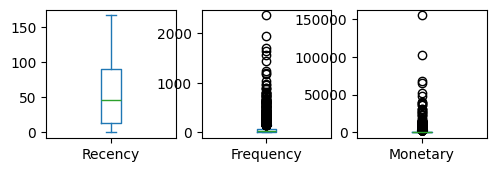

In [ ]:
 df1.plot(kind="box", subplots=True, figsize=(100,100), layout=(50,50))

,0
Quantity,"Axes(0.125,0.867124;0.0129599x0.0128763)"
UnitPrice,"Axes(0.140552,0.867124;0.0129599x0.0128763)"
CustomerID,"Axes(0.156104,0.867124;0.0129599x0.0128763)"
Profit,"Axes(0.171656,0.867124;0.0129599x0.0128763)"


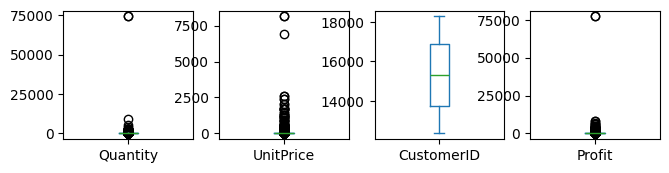

In [ ]:
 df.plot(kind="box", subplots=True, figsize=(100,100), layout=(50,50))

,0
Days since last purchase,"Axes(0.125,0.867124;0.0129599x0.0128763)"
Count of Orders,"Axes(0.140552,0.867124;0.0129599x0.0128763)"
Sum of Profit,"Axes(0.156104,0.867124;0.0129599x0.0128763)"


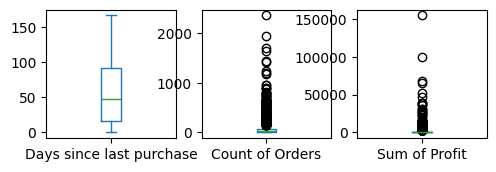

In [ ]:
df_viz.plot(kind="box", subplots=True, figsize=(100,100), layout=(50,50))

In [ ]:
d=df_viz.copy()
for col in (df_viz.select_dtypes(include=np.number)).columns:
    q1 = df_viz[col].quantile(0.25)
    q3 = df_viz[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    df_viz=df_viz.loc[(df_viz[col] <= upper_limit) & (df_viz[col] >= lower_limit)]
print('Before removing outliers:', len(d))
print('After removing outliers:',len(df_viz))
print('Outliers:', len(d)-len(df_viz))

Before removing outliers: 2738
After removing outliers: 2258
Outliers: 480


In [ ]:
for col in df1.columns:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    df2=df1.loc[(df1[col] <= upper_limit) & (df1[col] >= lower_limit)]
print('Before removing outliers:', len(df1))
print('After removing outliers:',len(df2))
print('Outliers:', len(df1)-len(df2))

Before removing outliers: 2649
After removing outliers: 2359
Outliers: 290


In [ ]:
df_numerics_only = df.select_dtypes(include=np.number)

for col in df_numerics_only:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    df3=df.loc[(df[col] <= upper_limit) & (df[col] >= lower_limit)]
print('Before removing outliers:', len(data))
print('After removing outliers:',len(df3))
print('Outliers:', len(data)-len(df3))

Before removing outliers: 190996
After removing outliers: 175603
Outliers: 15393


,0
Recency,"Axes(0.125,0.867124;0.0129599x0.0128763)"
Frequency,"Axes(0.140552,0.867124;0.0129599x0.0128763)"
Monetary,"Axes(0.156104,0.867124;0.0129599x0.0128763)"


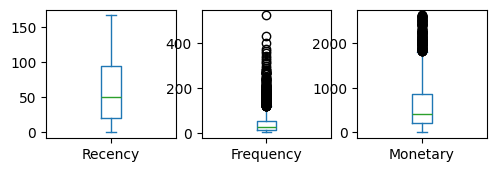

In [ ]:
df2.plot(kind="box", subplots=True, figsize=(100,100), layout=(50,50))

,0
Days since last purchase,"Axes(0.125,0.867124;0.0129599x0.0128763)"
Count of Orders,"Axes(0.140552,0.867124;0.0129599x0.0128763)"
Sum of Profit,"Axes(0.156104,0.867124;0.0129599x0.0128763)"


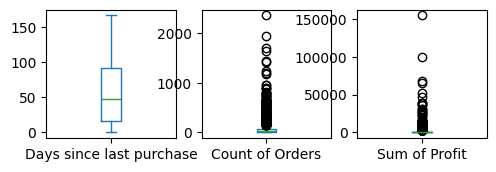

In [ ]:
d.plot(kind="box", subplots=True, figsize=(100,100), layout=(50,50))

,0
Quantity,"Axes(0.125,0.867124;0.0129599x0.0128763)"
UnitPrice,"Axes(0.140552,0.867124;0.0129599x0.0128763)"
CustomerID,"Axes(0.156104,0.867124;0.0129599x0.0128763)"
Profit,"Axes(0.171656,0.867124;0.0129599x0.0128763)"


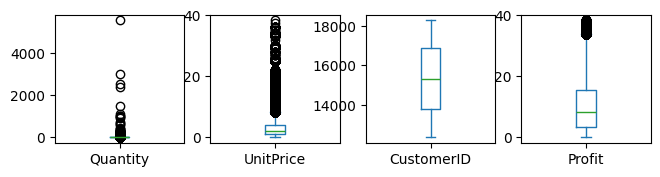

In [ ]:
 df3.plot(kind="box", subplots=True, figsize=(100,100), layout=(50,50))

<a id="8"></a>
# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Visualization</p>

## Business Questions
- What are our 5 most selling products?
- What are our 5 most profitable products?
- Our top 10 Profitable countries?
- Our top 10 countries with high demands?
- Top 5 Products with High Demand?
- Top 5 Countries with more customers?
- Top 5 Countries with less customers?
- What is the highest profitable month?
- What is the month with most demands?
- Do Frequent Customers bring much profit?

In [ ]:
df_viz = df_viz.sort_values("Sum of Profit", ascending=False)
df_viz.head()

,Days since last purchase,Count of Orders,Sum of Profit,Country
CustomerID,,,,
17001.0,1,78,1801.94,United Kingdom
15301.0,21,67,1797.09,United Kingdom
13725.0,18,94,1794.15,United Kingdom
15521.0,6,124,1792.78,United Kingdom
17722.0,110,80,1786.98,United Kingdom


In [ ]:
by_profit = data.groupby("Country")["Profit"].sum().reset_index().sort_values('Profit', ascending=False).reset_index(drop=True)
by_orders = data.groupby("Country")["InvoiceNo"].count().reset_index().sort_values('InvoiceNo', ascending=False).reset_index(drop=True).rename(columns={'InvoiceNo':'Count of Orders'})

viz = by_profit.head(11)
viz2 = by_orders.head(11)
viz_wuk_profit = by_profit.drop(index=0).head(10)
viz_wuk_order = by_orders.drop(index=0).head(10)


In [ ]:
viz3 = data.groupby("Country")['CustomerID'].count().reset_index().sort_values('CustomerID', ascending=False)
viz3 = viz3.rename(columns={'CustomerID':'No. of Customers'}).reset_index(drop=True)
least_customers = viz3.tail(5)
high_customers = viz3.head(5)

In [ ]:
viz4 = data.groupby(['Description','UnitPrice'])['InvoiceNo'].count().reset_index().sort_values('InvoiceNo', ascending=False)
viz4_1 = data.groupby(['Description','UnitPrice'])['Profit'].sum().reset_index().sort_values('Profit', ascending=False)
viz4 = viz4.rename(columns={'InvoiceNo':'Count of Orders'}).reset_index(drop=True)
high_order = viz4.head(6)
high_profit = viz4_1.head(6)

In [ ]:
monthly_profit = data.groupby(['InV_Month', 'InV_Year'])['Profit'].sum().reset_index()
highest_profit_month = monthly_profit.loc[monthly_profit['Profit'].idxmax()]

In [ ]:
monthly_demand = data.groupby(['InV_Month','InV_Year'])['Quantity'].sum().reset_index()
highest_demand_month = monthly_demand.loc[monthly_demand['Quantity'].idxmax()]

In [ ]:
product_quantity_sold = df.groupby('Description')['Quantity'].sum().reset_index()
product_quantity_sold_sorted = product_quantity_sold.sort_values(by='Quantity', ascending=False)
top_5_selling_products = product_quantity_sold_sorted.head(5)

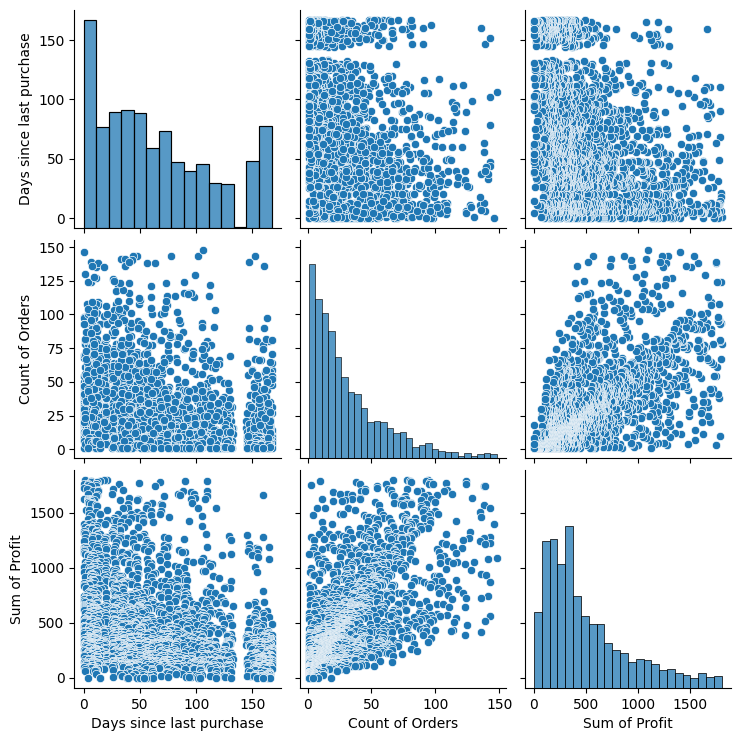

In [ ]:
sns.pairplot(df_viz)

In [ ]:
fig = px.scatter(df_viz, x="Days since last purchase", y="Sum of Profit",
	         size="Count of Orders", color="Country", size_max=60, log_y=True, title="Decoding Online Retail Success: Is it about Recency, Monetary, or Frequency?")
fig.show()
# Model idea introduction

In [ ]:
fig = px.scatter(df_viz, x="Sum of Profit", y="Count of Orders",
	         size="Count of Orders", color="Country", size_max=60, log_y=True, title="Decoding Online Retail Success: Is it about Recency, Monetary, or Frequency?")
fig.show()

In [ ]:
# Top 10 Profitable Countries
fig = px.bar(viz, x='Country', y='Profit', log_y=True, title='Top 10 Profitable Countries')
fig.show()

In [ ]:
# Top 10 Profitable Countries(w/UK)
fig = px.bar(viz_wuk_profit, x='Country', y='Profit', title='Top 10 Profitable Countries (UK excluded)')
fig.show()

In [ ]:
#Top 10 countries with highest demands
fig = px.bar(viz2, x='Country', y="Count of Orders", log_y=True, title='Top 10 Countries with Highest demand')
fig.show()

In [ ]:
# Top 10 Countries with Highest demand(w/UK)
fig = px.bar(viz_wuk_order, x='Country', y='Count of Orders', title='Top 10 Countries with Highest demand (UK excluded)')
fig.show()

In [ ]:
fig = px.bar(least_customers, x='Country', y='No. of Customers', title='Top 5 Countries with Least number of Customers')
fig.show()

In [ ]:
fig = px.bar(high_customers, x='Country', y='No. of Customers', log_y=True, title='Top 5 Countries with highest number of Customers')
fig.show()

In [ ]:
fig = px.bar(high_order, x='Count of Orders', y='Description', title='Top 5 Products with High Demand', orientation='h', hover_data=["UnitPrice"])
fig.show()

In [ ]:
fig = px.bar(top_5_selling_products, x='Quantity', y='Description',title='Top 5 Most Selling Products',orientation='h', hover_data=["Quantity"])
fig.show()

In [ ]:
fig = px.bar(high_profit, x='Profit', y='Description', title='Top 5 Profitable Products', orientation='h', hover_data=["UnitPrice"])
fig.show()

In [ ]:
fig = px.bar(monthly_profit, x='InV_Month', y='Profit', title='Total Profit by month', hover_data=['InV_Year'])
fig.update_traces(marker_line_width=1.5, opacity=0.6)
fig.update_layout(xaxis_title="month", yaxis_title="Total Profit")
fig.show()

In [ ]:
fig = px.bar(monthly_demand, x='InV_Month', y='Quantity', title='Total Demand by Month', hover_data=['InV_Year'])
fig.update_traces(marker_line_width=1.5, opacity=0.6)
fig.update_layout(xaxis_title="Month", yaxis_title="Total Quantity Sold")
fig.show()

<div style = 'border : 3px solid lightblue; background-color:#57BAC2;padding:10px'>



🔘 **step 6 : Scalling**


In [ ]:
scale = MinMaxScaler()
df_scaled = scale.fit_transform(df2)
df_scaled = pd.DataFrame(df_scaled, columns=df2.columns)

In [ ]:
df_scaled.head()

,Recency,Frequency,Monetary
0,0.239521,0.159004,0.695709
1,0.616766,0.030651,0.127197
2,0.155689,0.109195,0.411638
3,0.047904,0.022989,0.174922
4,0.203593,0.185824,0.924323


<a id="8"></a>
# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model building ⚙️</p>

****

<div style = 'border : 3px solid lightblue; background-color:#57BAC2;padding:10px'>



🔘 **Model-1 : Feature Extraction using PCA**




In [ ]:
import matplotlib.pyplot as plt

def pca_plot(cumulative_explained_variance, df):
    """
    Plot the cumulative explained variance to select the number of components.

    Parameters:
    cumulative_explained_variance (array): Cumulative explained variance ratio
    dfk (pandas dataframe): Original data
    """
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA Explained Variance')
    plt.show()

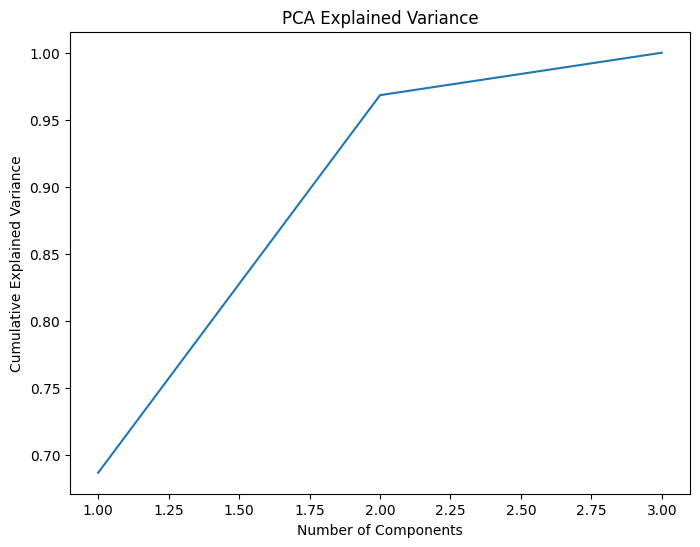

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components equal to the number of scaled features
pca = PCA(n_components=df_scaled.shape[1])

# Fit PCA to the scaled data
pca.fit(df_scaled)

# Calculate the explained variance and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Visualize the explained variance to select the number of components
pca_plot(cumulative_explained_variance, df_scaled)

In [ ]:
pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA(n_components=2)

In [ ]:
scores_pca = pca.transform(df_scaled)

In [ ]:
scores_pca

array([[-0.32011517,  0.353862  ],
       [ 0.27280965, -0.00115184],
       [-0.27070724,  0.06159574],
       ...,
       [ 0.04202912, -0.23833915],
       [ 0.37648814, -0.09080623],
       [-0.20755476, -0.07715686]])

 ****

<div style = 'border : 3px solid lightblue; background-color:#57BAC2;padding:10px'>



🔘 **Model-2 : KMean**




#### - **Selecting K number of Clusters**

In [ ]:
from sklearn.cluster import KMeans
sum_of_square_distance=[]
for k in range(1,11):
    km=KMeans(n_clusters =k,init="k-means++",max_iter=300, random_state=33)
    km=km.fit(scores_pca)
    sum_of_square_distance.append(km.inertia_)

Text(0, 0.5, 'Sum of Squared Distance')

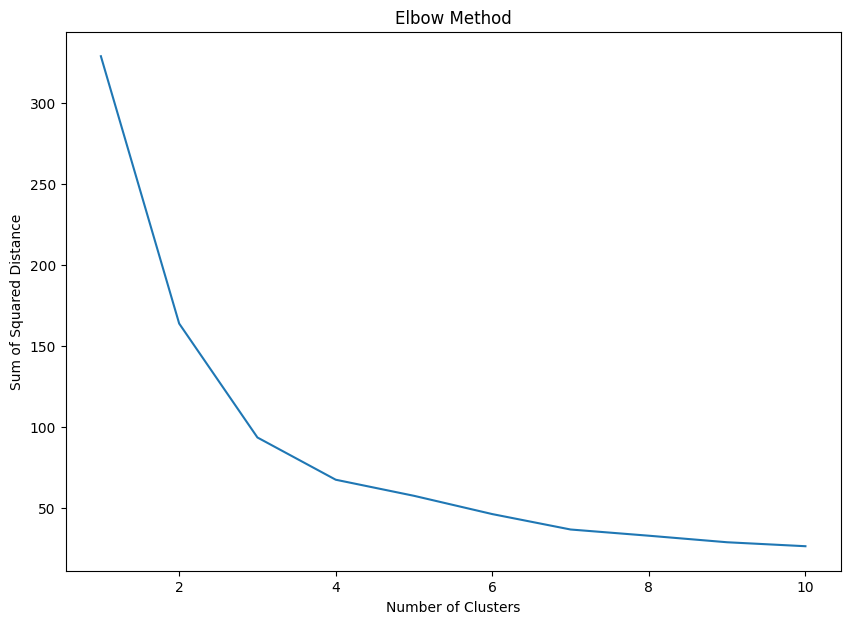

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11),sum_of_square_distance)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel("Sum of Squared Distance")

##### -From previous graph the expected number of clusters is 3


In [ ]:
Model = KMeans (n_clusters=3,
                init='k-means++',
                max_iter=300)
Model.fit(scores_pca)

KMeans(n_clusters=3)

In [ ]:
dfk = df2.copy()
dfk["Cluster"] = Model.labels_

dfk.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347.0,40,84,1823.43,0
12350.0,103,17,334.40,2
12354.0,26,58,1079.40,0
12355.0,8,13,459.40,1
12359.0,34,98,2422.21,0


In [ ]:
df_clustered = dfk.copy()
df_clustered['CustomerID'] = df_clustered.index.get_level_values('CustomerID')
df_clustered = df_clustered.reset_index(drop=True)

df_clustered.head()

,Recency,Frequency,Monetary,Cluster,CustomerID
0,40,84,1823.43,0,12347.0
1,103,17,334.40,2,12350.0
2,26,58,1079.40,0,12354.0
3,8,13,459.40,1,12355.0
4,34,98,2422.21,0,12359.0


In [ ]:
dfk.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         30.45    108.37  1599.74   449
1         36.73     30.03   429.26  1214
2        126.81     22.32   332.51   696

In [ ]:
from sklearn.metrics import silhouette_score

preds = Model.fit_predict(scores_pca)
silhouette = silhouette_score(scores_pca, preds)
print("Silhouette Coefficient:", silhouette)

Silhouette Coefficient: 0.47702832619681745


**Visualizing Clusters**

In [ ]:
import plotly.express as px

# Create a 3D scatter plot matrix with Plotly
fig = px.scatter_3d(dfk, x='Recency', y='Frequency', z='Monetary', color='Cluster')

fig.update_layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary',
    ),
    title='Clustering by Recency, Frequency, and TotalPrice',
    width=800,
    height=600
)

fig.show()

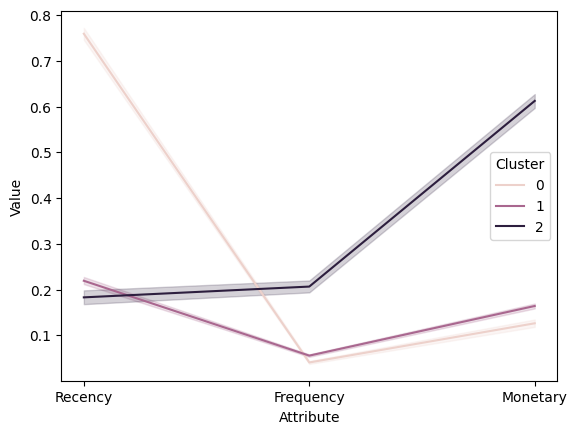

In [ ]:
# Visualising the Cluster Chartecteristics

df_normalized = pd.DataFrame(df_scaled, columns=['Recency', 'Frequency', 'Monetary'])
df_normalized['ID'] = df2.index
df_normalized['Cluster'] = Model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','Monetary'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_nor_melt)
plt.show()

 <div style = 'border : 3px solid lightblue; background-color:#F0F8FF;padding:10px'>
    
-**We deduce from the chart that cluster (0) is loyal:**
    
    * Monetary value is high --> They tend to ___spend more___
    * Frequency is high --> ___More orders___ is placed by them
    * Recency attribute is low --> ___less days___ between each purchase which means they bought the products ___more recently___

-they pay more, order more and they bought more recently, which means they are loyal to us and can be a good research data for making potential customers loyal.

    
    
-**We deduce from the chart that cluster (2) is Potential Customer:**
    
    * Monetary value is low --> They tend to ___spend less___
    * Frequency is low --> ___less orders___ is placed by them
    * Recency attribute is low --> ___less days___ between each purchase which means they bought the products ___more recently___

-they pay less, and order less but, they bought more recently which means we can convert them into loyal customers with good marketing and shopping deals.  
-they are also a good research data for attracting customers to our business.
    
    
-**We deduce from the chart that cluster (1) is Churn customers:**
    
    * Monetary value is low --> They tend to ___spend less___
    * Frequency is low --> ___less orders___ is placed by them
    * Recency attribute is high --> ___more days___ between each purchase which means they bought the products ___a while ago___

-they pay less, order less and they are old customers, this cluster can be depercated.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

def analyze_rfm_clusters_with_rf(data, cluster_labels, test_size=0.2):
    """
    Apply Random Forest to analyze patterns within RFM-based clusters.

    Parameters:
    data (pd.DataFrame): DataFrame containing RFM values
    cluster_labels (array): Cluster assignments from K-means
    test_size (float): Proportion of data to use for testing

    Returns:
    tuple: (trained model, feature importance dict, classification report)
    """
    # Add cluster labels to the dataset
    df = data.copy()
    df['Cluster'] = cluster_labels

    # RFM features
    rfm_features = ['Recency', 'Frequency', 'Monetary']

    # Prepare features and target
    X = df[rfm_features]
    y = df['Cluster']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Get feature importance
    feature_importance = dict(zip(rfm_features, rf.feature_importances_))
    feature_importance = dict(sorted(feature_importance.items(), key=lambda x: x[1], reverse=True))

    # Generate classification report
    clf_report = classification_report(y_test, y_pred)

    return rf, feature_importance, clf_report

def analyze_rfm_cluster_characteristics(data, cluster_labels):
    """
    Analyze RFM characteristics of each cluster.

    Parameters:
    data (pd.DataFrame): DataFrame containing RFM values
    cluster_labels (array): Cluster assignments

    Returns:
    dict: Detailed RFM insights for each cluster
    """
    df = data.copy()
    df['Cluster'] = cluster_labels
    rfm_features = ['Recency', 'Frequency', 'Monetary']
    cluster_insights = {}

    for cluster in np.unique(cluster_labels):
        cluster_data = df[df['Cluster'] == cluster]

        # Calculate cluster statistics
        cluster_stats = {
            'size': len(cluster_data),
            'percentage': (len(cluster_data) / len(df) * 100),
            'rfm_means': {
                'avg_recency': cluster_data['Recency'].mean(),
                'avg_frequency': cluster_data['Frequency'].mean(),
                'avg_monetary': cluster_data['Monetary'].mean()
            },
            'rfm_medians': {
                'median_recency': cluster_data['Recency'].median(),
                'median_frequency': cluster_data['Frequency'].median(),
                'median_monetary': cluster_data['Monetary'].median()
            },
            'customer_value': cluster_data['Monetary'].sum()
        }

        # Calculate relative performance (compared to overall average)
        overall_means = df[rfm_features].mean()
        relative_performance = {}
        for feature in rfm_features:
            cluster_mean = cluster_data[feature].mean()
            relative_performance[feature] = (cluster_mean - overall_means[feature]) / overall_means[feature] * 100

        cluster_stats['relative_performance'] = relative_performance

        cluster_insights[f'Cluster_{cluster}'] = cluster_stats

    return cluster_insights

def get_cluster_recommendations(cluster_insights):
    """
    Generate business recommendations based on cluster characteristics.

    Parameters:
    cluster_insights (dict): Output from analyze_rfm_cluster_characteristics

    Returns:
    dict: Marketing and engagement recommendations for each cluster
    """
    recommendations = {}

    cluster_definitions = {
        'Cluster_0': {
            'customer_type': 'Loyal Customers',
            'marketing_approach': [
                'Exclusive VIP rewards program',
                'Early access to new products/services',
                'Personalized thank you messages',
                'Premium customer service access',
                'Referral program incentives',
                'Birthday/anniversary special offers',
                'Regular feedback collection for service improvement'
            ],
            'retention_strategy': [
                'Focus on maintaining high satisfaction levels',
                'Regular engagement through personalized communication',
                'Proactive issue resolution',
                'Create brand ambassador opportunities'
            ],
            'priority_level': 'High - Retention Focus'
        },
        'Cluster_1': {
            'customer_type': 'Churn Customers',
            'marketing_approach': [
                'Win-back email campaign',
                'Special reactivation discounts',
                'Customer feedback survey',
                'Personal call from customer service',
                'Limited-time comeback offers',
                'Service improvement updates',
                'Risk-free trial of new services'
            ],
            'retention_strategy': [
                'Immediate intervention required',
                'Address past negative experiences',
                'Rebuild trust through transparent communication',
                'Offer improved value proposition'
            ],
            'priority_level': 'High - Recovery Focus'
        },
        'Cluster_2': {
            'customer_type': 'Potential Customers',
            'marketing_approach': [
                'Targeted promotional campaigns',
                'First-time purchase incentives',
                'Educational content about products/services',
                'Free trial or sample offers',
                'Social proof and testimonials',
                'Easy onboarding process',
                'Welcome package with special benefits'
            ],
            'retention_strategy': [
                'Focus on converting to regular customers',
                'Build relationship through valuable content',
                'Showcase customer success stories',
                'Provide excellent initial experience'
            ],
            'priority_level': 'Medium - Growth Focus'
        }
    }

    # Assign recommendations based on cluster definitions
    for cluster in cluster_insights.keys():
        if cluster in cluster_definitions:
            recommendations[cluster] = cluster_definitions[cluster]

    return recommendations

def analyze_and_predict_customer_value(data, cluster_labels):
    """
    Analyze potential customer value and predict future behavior based on RFM clusters.

    Parameters:
    data (pd.DataFrame): DataFrame containing RFM values
    cluster_labels (array): Cluster assignments

    Returns:
    dict: Cluster-wise value analysis and predictions
    """
    df = data.copy()
    df['Cluster'] = cluster_labels

    value_analysis = {}

    for cluster in np.unique(cluster_labels):
        cluster_data = df[df['Cluster'] == cluster]

        if cluster == 0:  # Loyal Customers
            potential_value = cluster_data['Monetary'].mean() * 1.2  # Assuming 20% growth potential
            churn_risk = 'Low'
            growth_potential = 'High'
        elif cluster == 1:  # Churn Customers
            potential_value = cluster_data['Monetary'].mean() * 0.5  # Assuming 50% recovery rate
            churn_risk = 'High'
            growth_potential = 'Low'
        else:  # Potential Customers
            potential_value = cluster_data['Monetary'].mean() * 1.5  # Assuming 50% growth potential
            churn_risk = 'Medium'
            growth_potential = 'Medium'

        value_analysis[f'Cluster_{cluster}'] = {
            'current_value': cluster_data['Monetary'].mean(),
            'potential_value': potential_value,
            'churn_risk': churn_risk,
            'growth_potential': growth_potential
        }

    return value_analysis

In [ ]:
# Get cluster insights and recommendations
cluster_insights = analyze_rfm_cluster_characteristics(dfk, Model.labels_)
recommendations = get_cluster_recommendations(cluster_insights)
value_analysis = analyze_and_predict_customer_value(dfk, Model.labels_)

# Print insights for each cluster
for cluster in ['Cluster_0', 'Cluster_1', 'Cluster_2']:
    print(f"\n{'='*50}")
    print(f"{recommendations[cluster]['customer_type']} (Cluster {cluster[-1]})")
    print(f"{'='*50}")

    # Print RFM metrics
    insights = cluster_insights[cluster]
    print("\nRFM Metrics:")
    print(f"Average Recency: {insights['rfm_means']['avg_recency']:.2f}")
    print(f"Average Frequency: {insights['rfm_means']['avg_frequency']:.2f}")
    print(f"Average Monetary: ${insights['rfm_means']['avg_monetary']:.2f}")

    # Print customer value analysis
    value = value_analysis[cluster]
    print("\nValue Analysis:")
    print(f"Current Average Value: ${value['current_value']:.2f}")
    print(f"Potential Value: ${value['potential_value']:.2f}")
    print(f"Churn Risk: {value['churn_risk']}")
    print(f"Growth Potential: {value['growth_potential']}")

    # Print recommendations
    print("\nRecommended Marketing Approaches:")
    for approach in recommendations[cluster]['marketing_approach']:
        print(f"- {approach}")

    print("\nRetention Strategy:")
    for strategy in recommendations[cluster]['retention_strategy']:
        print(f"- {strategy}")

    print(f"\nPriority Level: {recommendations[cluster]['priority_level']}")


Loyal Customers (Cluster 0)

RFM Metrics:
Average Recency: 126.75
Average Frequency: 22.32
Average Monetary: $332.39

Value Analysis:
Current Average Value: $332.39
Potential Value: $398.87
Churn Risk: Low
Growth Potential: High

Recommended Marketing Approaches:
- Exclusive VIP rewards program
- Early access to new products/services
- Personalized thank you messages
- Premium customer service access
- Referral program incentives
- Birthday/anniversary special offers
- Regular feedback collection for service improvement

Retention Strategy:
- Focus on maintaining high satisfaction levels
- Regular engagement through personalized communication
- Proactive issue resolution
- Create brand ambassador opportunities

Priority Level: High - Retention Focus

Churn Customers (Cluster 1)

RFM Metrics:
Average Recency: 36.63
Average Frequency: 30.12
Average Monetary: $431.37

Value Analysis:
Current Average Value: $431.37
Potential Value: $215.69
Churn Risk: High
Growth Potential: Low

Recommend

In [ ]:
# Assuming you have:
# rfm_df: DataFrame with columns ['Recency', 'Frequency', 'Monetary']
# kmeans_labels: labels from your K-means clustering

# Train Random Forest and get insights
rf_model, feature_importance, classification_report = analyze_rfm_clusters_with_rf(
    data=dfk,
    cluster_labels=Model.labels_
)

# Print which RFM metrics are most important in defining clusters
print("RFM Feature Importance:")
for feature, importance in feature_importance.items():
    print(f"{feature}: {importance:.4f}")

RFM Feature Importance:
Recency: 0.5536
Monetary: 0.3256
Frequency: 0.1208


In [ ]:
# Get cluster characteristics
cluster_insights = analyze_rfm_cluster_characteristics(
    data=dfk,
    cluster_labels=Model.labels_
)

# Get recommendations for each cluster
recommendations = get_cluster_recommendations(cluster_insights)

# Print insights for each cluster
for cluster, insights in cluster_insights.items():
    print(f"\n{cluster}:")
    print(f"Size: {insights['size']} customers ({insights['percentage']:.1f}%)")
    print("\nRFM Averages:")
    for metric, value in insights['rfm_means'].items():
        print(f"- {metric}: {value:.2f}")
    print("\nRelative Performance:")
    for metric, perf in insights['relative_performance'].items():
        print(f"- {metric}: {'↑' if perf > 0 else '↓'}{abs(perf):.1f}%")

    # Print recommendations
    print("\nRecommendations:")
    cluster_rec = recommendations[cluster]
    print(f"Customer Type: {cluster_rec['customer_type']}")
    print("Marketing Approaches:")
    for approach in cluster_rec['marketing_approach']:
        print(f"- {approach}")


Cluster_0:
Size: 697 customers (29.5%)

RFM Averages:
- avg_recency: 126.75
- avg_frequency: 22.32
- avg_monetary: 332.39

Relative Performance:
- Recency: ↑104.1%
- Frequency: ↓47.7%
- Monetary: ↓46.7%

Recommendations:
Customer Type: Loyal Customers
Marketing Approaches:
- Exclusive VIP rewards program
- Early access to new products/services
- Personalized thank you messages
- Premium customer service access
- Referral program incentives
- Birthday/anniversary special offers
- Regular feedback collection for service improvement

Cluster_1:
Size: 1217 customers (51.6%)

RFM Averages:
- avg_recency: 36.63
- avg_frequency: 30.12
- avg_monetary: 431.37

Relative Performance:
- Recency: ↓41.0%
- Frequency: ↓29.4%
- Monetary: ↓30.8%

Recommendations:
Customer Type: Churn Customers
Marketing Approaches:
- Win-back email campaign
- Special reactivation discounts
- Customer feedback survey
- Personal call from customer service
- Limited-time comeback offers
- Service improvement updates
- Ri